<a href="https://colab.research.google.com/github/RennanRnz/RennanRnz/blob/main/MOD7TAR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('mod7tar1.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('mau', axis=1)
y = df['mau']

# Dividindo os dados em conjuntos de treinamento e teste (70% para treino, 30% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train, y_train

(       qtd_filhos      idade  tempo_emprego  possui_celular  \
 965             0  32.616438       6.767123               1   
 7874            2  47.271233      25.016438               1   
 10319           2  53.778082   -1000.665753               1   
 8807            0  41.487671       2.715068               1   
 438             0  50.613699       8.276712               1   
 ...           ...        ...            ...             ...   
 11284           1  39.654795       2.767123               1   
 11964           0  30.457534       7.331507               1   
 5390            0  64.345205   -1000.665753               1   
 860             0  35.353425      11.772603               1   
 15795           2  32.843836       4.101370               1   
 
        possui_fone_comercial  possui_fone  possui_email  \
 965                        0            1             1   
 7874                       0            1             0   
 10319                      0            0        

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [ ]:
# Criando o modelo de árvore de decisão
model = DecisionTreeClassifier()

# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

DecisionTreeClassifier()

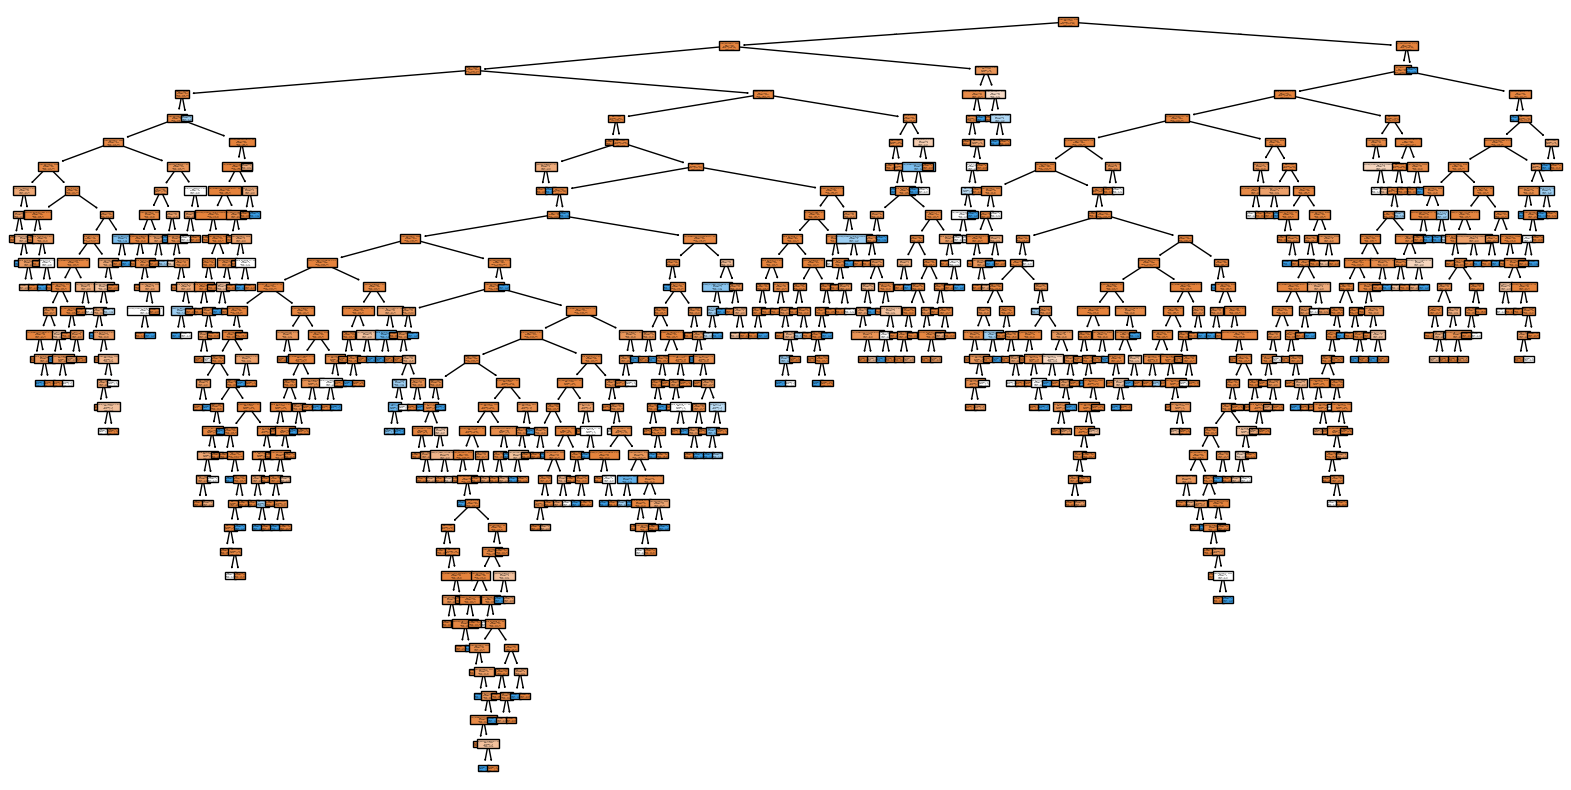

In [ ]:
# Visualizando a árvore de decisão
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['False', 'True'])
plt.show()

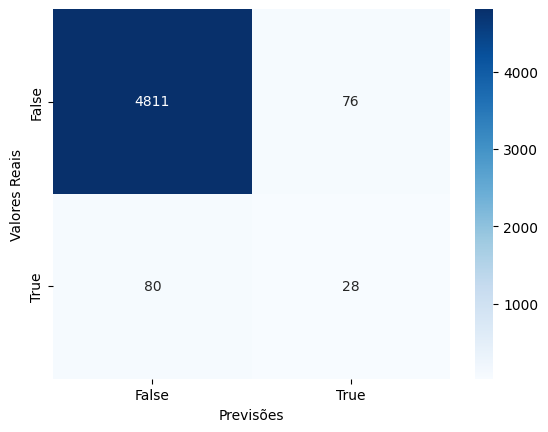

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.xticks(ticks=[0.5, 1.5], labels=['False', 'True'])
plt.yticks(ticks=[0.5, 1.5], labels=['False', 'True'])
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.9687687687687687


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

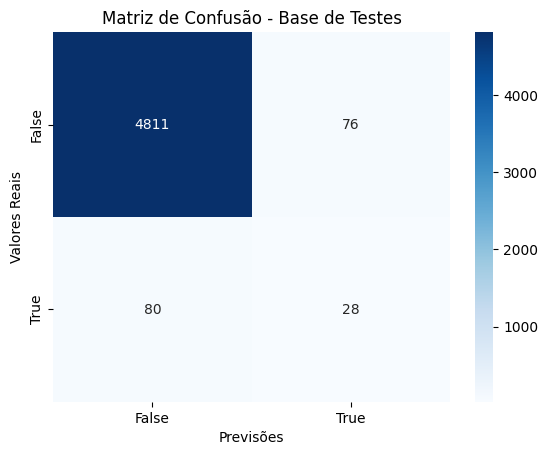

In [ ]:
# Fazendo previsões na base de teste
y_pred = model.predict(X_test)

# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.xticks(ticks=[0.5, 1.5], labels=['False', 'True'])
plt.yticks(ticks=[0.5, 1.5], labels=['False', 'True'])
plt.title('Matriz de Confusão - Base de Testes')
plt.show()

In [ ]:
# Calculando a acurácia da base de teste
accuracy_test = accuracy_score(y_test, y_pred)
print("Acurácia na base de testes:", accuracy_test)

# Comparando com a acurácia da base de treinamento
print("Acurácia na base de treinamento:", accuracy)

Acurácia na base de testes: 0.9687687687687687
Acurácia na base de treinamento: 0.9687687687687687


In [ ]:
# Criando uma nova árvore com hiperparâmetros ajustados
model_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
model_new.fit(X_train, y_train)

# Fazendo previsões na base de teste
y_pred_new = model_new.predict(X_test)

# Calculando a matriz de confusão e a acurácia
conf_matrix_new = confusion_matrix(y_test, y_pred_new)
accuracy_new = accuracy_score(y_test, y_pred_new)

# Visualizando a matriz de confusão e imprimindo a acurácia
# ... (código similar ao anterior)

# Distribuição da predição
print("Proporção de proponentes classificados como 'maus':", sum(y_pred_new == 0) / len(y_pred_new))

Proporção de proponentes classificados como 'maus': 0.9935935935935936


In [ ]:
# Criando um vetor de previsões onde todos são classificados como 'bons'
y_pred_all_bons = np.ones(len(y_test))

# Calculando a acurácia
accuracy_all_bons = accuracy_score(y_test, y_pred_all_bons)
print("Acurácia classificando todos como 'bons':", accuracy_all_bons)

Acurácia classificando todos como 'bons': 0.021621621621621623


----------------------------------------------------------------------------------------